# 자연어 처리
- 자연어 (사람들이 일상적으로 사용하는 언어) 처리 
- 자연어 처리하는 분야
    - 자연어 이해: 형태소 분석 -> 의미 분석 -> 대화분석 
    - 자연어 생성: 대화분석 -> 다음 문장이나 단어 출력 
- 활용 분야: 맞춤법검사, 번역기, 검색 엔진, 키워드분석


# 형태소 분석 절차
- 전처리: 단어, 어절 추출
- 분석 후보 생성: 형태소 분리, 원형복원, 품사 태깅
- 제약조건 규칙 확인 / 불용어 (안쓰는 단어) 처리
- 분석 

# 한글 형태소 분석 엔진
- KoNLPy: 파이썬용 자연어 처리기 (JPypel 패키지를 의존)
- KOMORAN: 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수)
- HanNanum: 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수)
- Kkma: 서울대학교 연구실 
- KoNLP: R용 자연어 처리기

In [1]:
# java_home있는지 확인 c:/program Files / java                  # pip show JPypel       pip uninstall JPypel
#Step1
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl 
# KoNLPy 패키지 install
  

Processing d:\bigdata(psa)\src\9_자연어 처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [2]:
text =""" 아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다 """

## HanNanum

In [3]:
#Step(2)아나콘다에 plp install konlpy
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

In [4]:
# 한나눔, 꼬꼬막,꼬막스  3개 많이 사용 

https://konlpy.org/en/latest/ <BR>
    **API -> 그 위에   'Comparison between POS tagging classes'   --> 'Korean POS tags comparison chart'참조**

In [5]:
# 품사 태깅
print(han.pos(text,ntags=9)) #디폴트가 ntags= 9    9가지 품사 

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


더 세부적인 카테고리로 나눠짐 (ntags= 숫자)는  위 'Korean POS tags comparison chart'에 있는 숫자만 가능 

In [6]:
print(han.pos(text,ntags=22))   #형태소 분석(POS-tagging)이란 원시말뭉치를 형태소 단위로 쪼개고 각 형태소에 품사 정보를 부착하는 작업을 가리킵니다. 

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [7]:
# text 중에 형용사 (PA)만 추출 
tagged_text = han.pos(text,ntags=22)
tagged_text   #list에 tuple형식

[('아름답', 'PA'),
 ('지만', 'EC'),
 ('다소', 'MA'),
 ('복잡', 'NC'),
 ('하', 'XS'),
 ('기', 'ET'),
 ('도', 'JX'),
 ('하', 'PV'),
 ('ㄴ', 'ET'),
 ('한국어', 'NC'),
 ('는', 'JX'),
 ('전세계', 'NC'),
 ('에서', 'JC'),
 ('13', 'NN'),
 ('번', 'NB'),
 ('째', 'XS'),
 ('로', 'JC'),
 ('많', 'PA'),
 ('이', 'XS'),
 ('사용', 'NC'),
 ('되', 'XS'),
 ('는', 'ET'),
 ('언어', 'NC'),
 ('이', 'JP'),
 ('ㅂ니다', 'EF')]

In [24]:
tagged_text = han.pos(text,ntags=22)
l=[]
for t in tagged_text:
    if t[1] == 'PA':
        l.append(t[0])
l        

['아름답', '많']

### - **간략한 버전**

In [12]:
#step1:[for t in tagged_text if t[1]=='PA']
[t[0] for t in tagged_text if t[1]=='PA']

['아름답', '많']

In [11]:
#명사문 추출
han.nouns(text)

['복잡', '한국어', '전세계', '13번', '사용', '언어']

## Kkma

In [16]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size = 1024)  #힘메모리 사이즈 늘릴 때 사용 
print(kkma.morphs(text)) #형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [18]:
print(kkma.pos(text,56))   #한나눔과 다르게 쪼갤 수 있음    # 안쓰면 30이 기본값

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [19]:
tagged_text = kkma.pos(text,56)
[ t[0] for t in tagged_text if t[1] == 'NNG']

['복잡', '한국어', '전세계', '사용', '언어']

- 명사를 다 추출

In [20]:
#명사를 다 추출
kkma.nouns(text)

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']

## Komoran

In [3]:
#   HanNanum, Kkma, Komoran 다 클래스 이름 
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=1024)  #heap memory      
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [4]:
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [5]:
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [6]:
#일반명사만 추출
tagged_text = komoran.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

['전', '세계', '사용', '언어']

# 말뭉치

In [8]:
print(r'Hello\nWorld') #craw data  #앞에r있으면  \n그대로 출력 
print('Hello\nWorld') 

Hello\nWorld
Hello
World


In [10]:
from konlpy.corpus import kolaw   #패키지 안에 있는 데이터   (C:\Users\tjoeun\anaconda3\Lib\site-packages\konlpy\data\corpus\kolaw)
data = kolaw.open('constitution.txt').read()
print(len(data))
print(data[:20])

18884
대한민국헌법

유구한 역사와 전통에 


In [14]:
from konlpy.corpus import kobill
data1 = kobill.open('1809892.txt').read()[:1000]
data1    #print(data1)하면 형식그대로 나옴

'교육공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9892\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행 교육공무원의 육아휴직은 만 6세 이하의 초등학교 취학 전 자\n\n녀의 육아를 위한 경우로 한정되어 있어 초등학교 취학 후 등하교 및 \n\n방과 후 양육 등에 어려움이 많고, 저학년 자녀 혼자 등하교를 하거나 \n\n어른 없는 집에서 지내다가 성폭력 범죄 등 흉악범죄의 피해자가 되\n\n고 있음. \n\n  이에 육아휴직 가능 시기를 만 8세 이하의 자녀로 확대하여 자녀가 \n\n초등학교에 입학하여 학교생활에 순조롭게 적응할 수 있는 나이까지 \n\n교육공무원이 자녀양육을 위해서 휴직할 수 있도록 하려는 것임(안 제\n\n44조제1항제7호). \n\n- 1 -\n\n\x0c법률  제        호\n\n교육공무원법 일부개정법률안\n\n교육공무원법 일부를 다음과 같이 개정한다.\n\n제44조제1항제7호 중 “자녀(만 6세 이하의 초등학교 취학 전 자녀)”를 \n\n“만 8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자\n\n녀”로 한다.\n\n제45조제1항제6호 중 “1년 이내로 한다. 다만, 여자 교육공무원의 경\n\n우 任用權者는 2年의 범위내에서 그 休職期間을 연장할 수 있다.”를 \n\n“1년 이내(여자 교육공무원 3년 이내)로 하되, 분할하여 휴직할 수 있\n\n다.”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n第44條(休職) ① 敎育公務員이 다\n\n第44條(休職) ① ---------------\n\n음 각 호의 어느 하나에 해당\n\n----------------------------\n\n하

# 워드 클라우드

In [15]:
type(data)

str

In [38]:
word_list = komoran.nouns(data)  #대한민 국   이러면 안에 있는 \n을 같이 뽑아야 
word_list

['대한민국',
 '헌법',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일',
 '사명',
 '입각',
 '정의',
 '인도',
 '동포애',
 '민족',
 '단결',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유',
 '민주',
 '기본',
 '질서',
 '정치',
 '경제',
 '사회',
 '문화',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리들의',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '년',
 '7월 12일',
 '제정',
 '차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민',
 '투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유',
 '민주',
 '기본',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전',
 '보장',
 '국토방위',
 '신성',
 '의무',
 '수행',
 '사명',
 

In [18]:
i=20
print("i={:d}".format(i))
print("i=%d" % (i) )

i=20
i=20


- '일반명사'만 추출

일반명사 출현 수: 3358
출현 일반명사 종류 수: 888
한 단어당 평균 반복 횟수: 3.7815315315315314
<class 'list'>


(-0.5, 399.5, 199.5, -0.5)

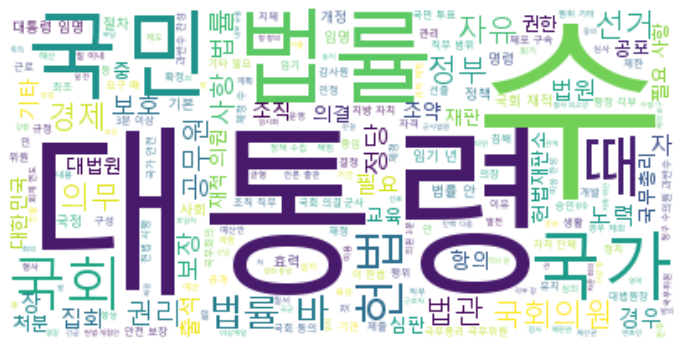

In [41]:
#일반 명사를 추출
tagged_data = komoran.pos(data)
[t[0] for t in tagged_data if t[1]=='NNG']

print('일반명사 출현 수:', len(word_list)) 
print('출현 일반명사 종류 수:', len(set(word_list)))
print('한 단어당 평균 반복 횟수:', len(word_list)      /    len(set(word_list))     )
print(type(word_list))  #월드클라우드에  list가 들어가면 안되고, 'text'가 들어가야 

text= ' '.join(word_list)

#워드 클라우드
wordc = WordCloud(background_color='white', max_words=300, font_path=':/Windows/fonts/malgun.ttf')
wordc.generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordc, interpolation='bilinear') #bilinear 보강법 
plt.axis('off')

- '명사' 다 추출

In [25]:
word_list = komoran.nouns( "%r" % data)  #%r는  raw data    줄바꿈기호가 그대로 넘어감   #명사만 추출 
print('명사 출현 수:', len(word_list)) 
print('출현 명사 종류 수:', len(set(word_list)))
print('한 단어당 평균 반복 횟수:', len(word_list)      /    len(set(word_list))     )
print(type(word_list))  #월드클라우드에  list가 들어가면 안되고, 'text'가 들어가야 

명사 출현 수: 3361
출현 명사 종류 수: 891
한 단어당 평균 반복 횟수: 3.772166105499439
<class 'list'>


In [27]:
print(word_list[:20])

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁']


### 하나의 text로  

In [28]:
text = ' '.join(word_list)  #space하나 꼭 넣어주어야 글자로 인식
text[:200]

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인'

### pip install WordCloud

In [ ]:
# 아나콘다프롬프트에서 pip install WordCloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

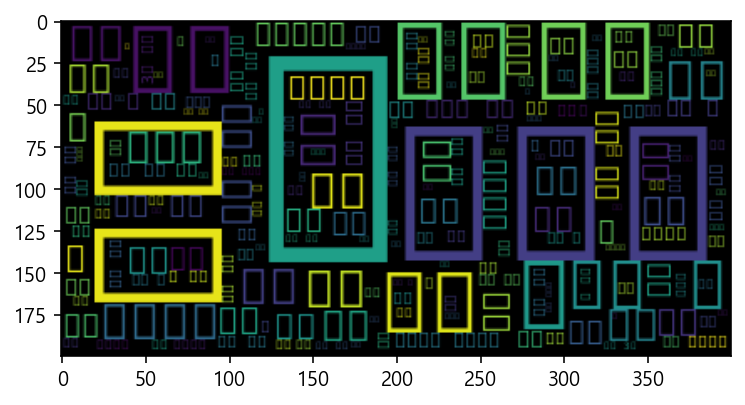

In [87]:
wordc = WordCloud()   #생성자 호출. 안에 아무것도 없으면 '기본적으로 WordCloud 생성해줌'
wordc.generate(text)   #내가 만든 변수wordc 클라우드형태
plt.figure()              
plt.imshow(wordc,interpolation='bilinear')       #한글 폰트 지정

(-0.5, 399.5, 199.5, -0.5)

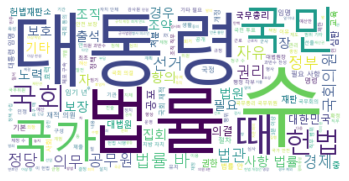

In [34]:
# 워드클라우드 
wordc = WordCloud(background_color = 'white', 
                  max_words=300, font_path =":/Windows/fonts/malgun.ttf",   # 그중 빈도 높은 300개 #font_path지정을 해야 한글이 안깨짐
                 relative_scaling=0.2) 
wordc.generate(text)

plt.figure()
plt.imshow(wordc, interpolation="bilinear")
plt.axis('off')   #축 없애기 

### 불용어 처리

In [52]:
#불용어 처리 (불용어 사전 + 불용어)
from wordcloud import STOPWORDS
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
불용어 = STOPWORDS | ENGLISH_STOP_WORDS| set(['대통령','수'])
불용어 = set(['대통령','수'])

(-0.5, 399.5, 199.5, -0.5)

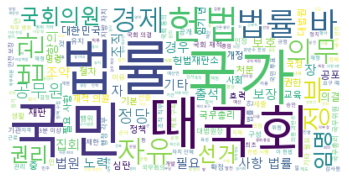

In [53]:
wordc = WordCloud(background_color = 'white', 
                  max_words=300, font_path ="c:/Windows/fonts/malgun.ttf",   # 그중 빈도 높은 300개 #font_path지정을 해야 한글이 안깨짐
                 relative_scaling=0.2,
                 stopwords=불용어)   ### *************stopwords=불용어 추가 ***********
wordc.generate(text)

plt.figure()
plt.imshow(wordc, interpolation="bilinear")
plt.axis('off')   #축 없애기 

### 최종 버전 (밑 과정)

In [ ]:
#마스킹: wordcloud를 지정된 '마스크 이미지(mask image)'에 맞도록 표시 
from PIL import Image
import numpy as np 
img = Image.open('south_korea.png').convert('RGBA')
#png파일: 'RGBA'로    jpg파일:'RGB'      
mask = Image.new('RGB',img.size,(0,0,0))   #mask를 씌워서 위에 이미지를 넣어야 나옴
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)       #np.array로 바꿔서 넘겨야 ********************      

wordcloud = WordCloud(background_color='white',
                     max_words=700,    #위 전체length 661   
                     font_path="c:/Windows/fonts/malgun.ttf",
                     relative_scaling=0.1,
                     mask=mask) 
wordcloud.generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


### 워드클라우드에 이미지 입히기

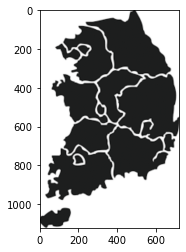

In [60]:
#마스킹: wordcloud를 지정된 '마스크 이미지(mask image)'에 맞도록 표시 
from PIL import Image
import numpy as np 
img = Image.open('south_korea.png').convert('RGBA')
#png파일: 'RGBA'로    jpg파일:'RGB'      
mask = Image.new('RGB',img.size,(0,0,0))   #mask를 씌워서 위에 이미지를 넣어야 나옴
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)       #np.array로 바꿔서 넘겨야 ********************      


wordcloud = WordCloud(background_color='white',
                     max_words=700,    #위 전체length 661   
                     font_path="c:/Windows/fonts/malgun.ttf",
                     relative_scaling=0.1,
                     mask=mask) 
wordcloud.generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')





In [61]:
mask # 앞에 출력하면 이미지, 지금은 '배열(array)'

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 719.5, 1123.5, -0.5)

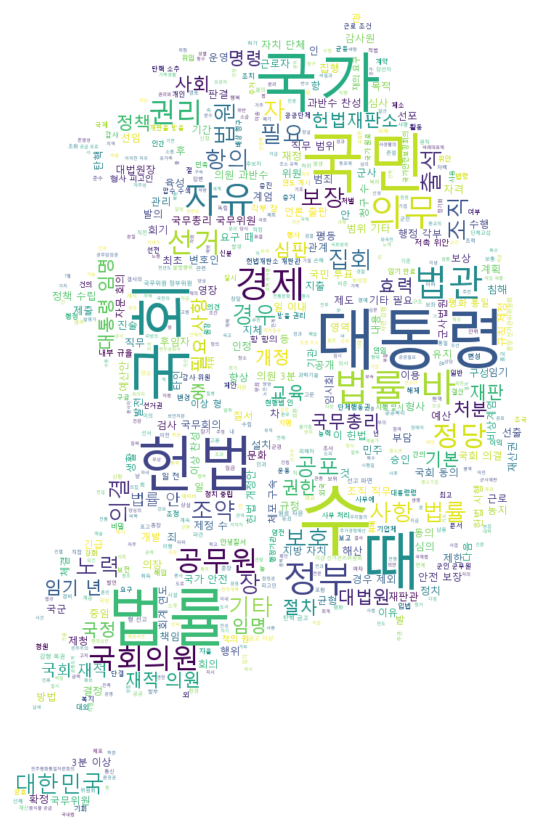

In [63]:
wordcloud = WordCloud(background_color='white',
                     max_words=700,    #위 전체length 661   
                     font_path="c:/Windows/fonts/malgun.ttf",
                     relative_scaling=0.1,
                     mask=mask) 
wordcloud.generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### 파일저장

In [65]:
wordcloud.to_file("south_korea_wordcloud.png")

(-0.5, 899.5, 899.5, -0.5)

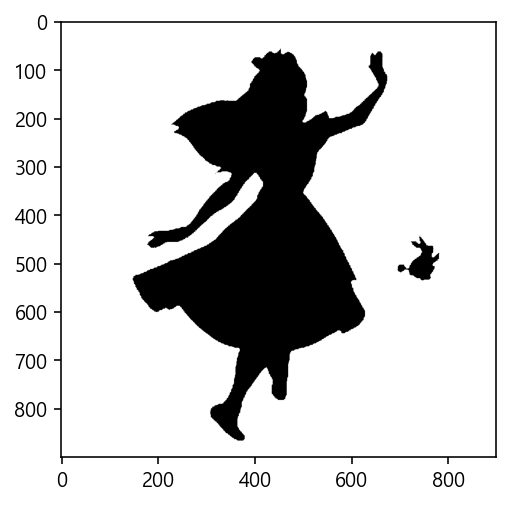

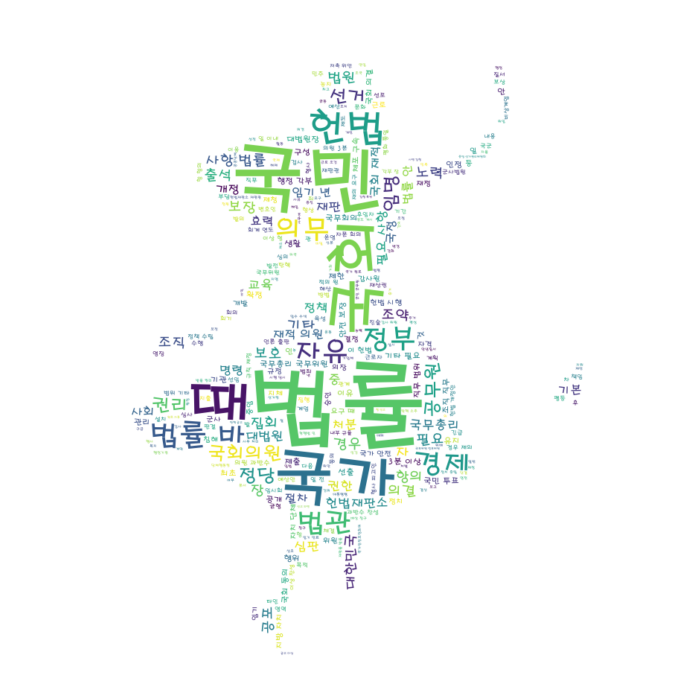

In [88]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('test3.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)
wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='c:/Windows/Fonts/H2PORM.TTF',
                     relative_scaling=0.1,
                     mask=mask,
                     stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 단어 빈도수 계산 

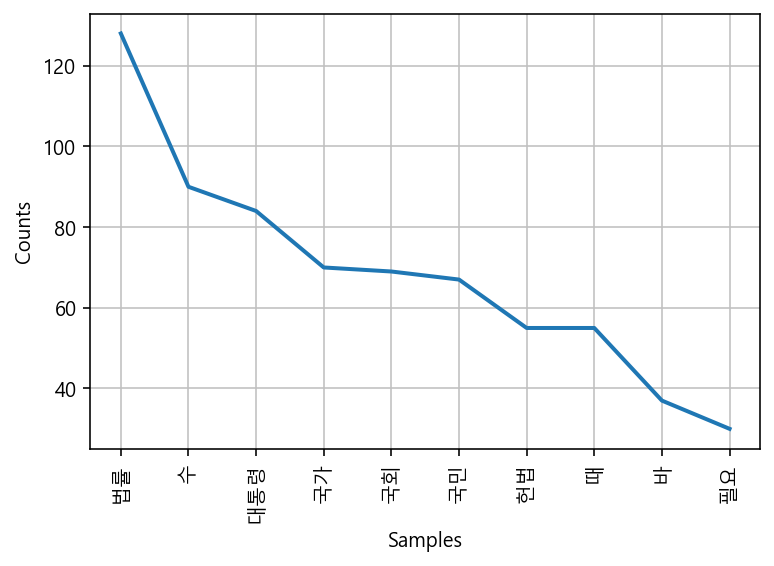

In [69]:
# 단어 빈도수 계산
import nltk
import matplotlib.pyplot as plt    #한글 설정 하기 위해
%config InlineBackend.figure_format = 'retina'
plt.rc("font",family="Malgun Gothic")

word_list = komoran.nouns(data)
nltk.Text(word_list).plot(10)    

# 워드 임베딩
- 단어간 유사성 도출 

In [70]:
word_list 

['대한민국',
 '헌법',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일',
 '사명',
 '입각',
 '정의',
 '인도',
 '동포애',
 '민족',
 '단결',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유',
 '민주',
 '기본',
 '질서',
 '정치',
 '경제',
 '사회',
 '문화',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리들의',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '년',
 '7월 12일',
 '제정',
 '차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민',
 '투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유',
 '민주',
 '기본',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전',
 '보장',
 '국토방위',
 '신성',
 '의무',
 '수행',
 '사명',
 

기사 <br>
https://news.jtbc.joins.com/Etc/RssService.aspx  <br>

https://fs.jtbc.joins.com//RSS/economy.xml    
- RSS (RDF Site Summary or Really Simple Syndication) is a web feed that allows users and applications to access updates to websites in a standardized, computer-readable format.

In [ ]:
# 경제 기사 , 코로나와 유사성 

#코로나와 관련된것 뭐가 있는지 유사성 

# 크롤링 ==> 모든 기사 ==>
#이 뒤에 무슨 단어 RNN

In [2]:
# 뉴스 기사 link를  list 가져오기 
import requests
from bs4 import BeautifulSoup     #뷰티풀숩으로 webcrawling
rss_url = 'https://fs.jtbc.joins.com//RSS/economy.xml'
jtbc_economy = requests.get(rss_url)
economy_soup = BeautifulSoup(jtbc_economy.content,'xml')
link_list = economy_soup.select('item > link')      #뉴스 link 다 가져옴  [<link>https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856</link>,
link_list =  [link.text for link in link_list]   #리스트로 링크주소만 가져옴
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997623',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997533',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [ ]:
# 첫 번째 기사에 뜨고, 마지막 기사에 떴다 유사성이 멀다. 가까우면 유사성이 높다. 예: '배고프다.' '밥먹자'    ==> 이 두개는 유사성이 높다는 뜻

비지도 학습 

In [ ]:
len(link_list)

In [3]:
# 뉴스 기사를 명사들만 뽑아 word embedding하기 좋게 만들기 
#명사만 추출, 뉴스에 append
from konlpy.tag import Kkma
kkma= Kkma()
news = []

for link in link_list:
    news_response = requests.get(link)
    news_soup = BeautifulSoup(news_response.content, "html.parser")
    news_title= news_soup.select_one('h3#jtbcBody')
    news_content= news_soup.select_one('div#articlebody > div.article_content')
    content = news_title.text + ' '+ news_content.text
    news.append(kkma.nouns(content))



In [95]:
print(news[:2])

[['주택', '처분', '처분하라', '하라', '용도', '용도변경', '변경', '의원', '꼼수', '절세', '의혹', '앵커', '공직자', '재산', '이번', '공개', '정부', '여당', '집이', '2', '2채', '채', '이상', '이후', '집', '경우', '주택자', '소식', '상가', '국회의원', '여럿', '김', '연', '기자', '보도', '서울', '명일', '명일동', '동', '다세대', '민주당', '최종', '최종윤', '윤', '이곳', '1', '1층', '층', '얼마', '전', '근린', '근린생활시설', '생활', '시설', '최', '전셋집', '본인', '소유', '현장', '흔적', '씨', '인근', '상점', '주인', '옆', '지금', '호로', '거', '사람', '3', '3년', '년', '이사', '나', '적', '올해', '재산공개', '약속', '명', '당의', '유기', '유기홍', '홍', '배우자', '명의', '인천', '강화', '강화군', '군', '단독', '단독주택', '1주택자', '당', '임종', '방식', '1채', '지난해', '고위', '고위공직자', '1가구', '가구', '1주택', '보유', '권유', '물론', '건', '국민', '힘', '김미애', '미', '애', '부산', '아파트', '건물', '신고', '절차', '주택자가', '자가', '하면', '수가', '종합', '종합부동산세', '부동', '산세', '때', '중과', '양도', '양도세', '세', '수', '전문가', '로', '의심', '지적', '권', '권대중', '대중', '명', '명지대', '지대', '부동산', '부동산학과', '학과', '교수', '이하', '일반', '주거', '주거지역', '지역', '건', '불법', '약', '거지', '세금', '절세방법', '방법', '이용', '인턴', '인턴기자', '영'], ['신도시', '발표', '땅',

- **conda install gensim혹은**
- **pip install gensim**
- pip show gensim
- pip uninstall gensim



In [8]:
#워디 임베딩하기
from gensim.models import Word2Vec
model = Word2Vec(news, size=100,window=5, min_count=2, workers=-1)  #단어가 나오는 빈도수가 2번 이상 
model.wv.most_similar("분양")   # 있는 단어를 넣어야 에러안남. 없는 단어이면 에러남 

[('은행', 0.3110431730747223),
 ('지적도', 0.26592540740966797),
 ('양도세', 0.25756892561912537),
 ('선', 0.25013771653175354),
 ('가구', 0.24292245507240295),
 ('국경', 0.23780354857444763),
 ('사업', 0.2363283783197403),
 ('4년', 0.22587715089321136),
 ('의심', 0.2245899736881256),
 ('구', 0.2203546017408371)]

In [10]:
model.wv.most_similar("분양",topn=5) #코로나와 유사한 단어5개

[('은행', 0.3110431730747223),
 ('지적도', 0.26592540740966797),
 ('양도세', 0.25756892561912537),
 ('선', 0.25013771653175354),
 ('가구', 0.24292245507240295)]